# Data stacking - Pulsars

Data stacking is a common technique used in many sciences to improve the signal to noise ratio.
In astronomy it has been applied in many analysis, the key factor being having a good idea of the location of the object of interest, often this is done by combining one observation  in say visible light with another in say radio where a detection was not possible without stacking.


In this work a sample set of pulsar data was provided - a small sub set for testing (mean and median example data) and a 1000 fits image set for further work, with the pulsars set at the centre of the 200 x 200 grid.


Further reading can be found at:

White, R. L., Helfand, D. J., Becker, R. H., Glikman, E., & de Vries, W. (2007). Signals from the noise: Image stacking for quasars in the FIRST survey. The Astrophysical Journal, 654(1), 99-114. doi:10.1086/507700


Lindroos, L., Knudsen, K., Vlemmings, W., Conway, J., Marti-Vidal, I. (2015). Stacking of large interferometric data sets in the image- and uv-domain - a comparative study. Monthly Notices of the Royal Astronomical Society, 446(4), 3502-3515. doi:10.1093/mnras/stu2344

Hancock, P. P., Gaensler, B. M., & Murphy, T. (2011). Visibility stacking in the quest for type ia supernova radio emission. Astrophysical Journal Letters, 735(2) doi:10.1088/2041-8205/735/2/L35


Based on work in Coursera - data driven Astronomy week 1

In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import glob

In [ ]:
def simple_median(flist):
    """
    
    """
    nfile = len(flist)
    
    # open first file
    hdulist = fits.open(flist[0])
    med_data = hdulist[0].data
    hdulist.close()
    
    for file in flist[1:]:
        # open each file
        hdulist = fits.open(file)
        dat = hdulist[0].data
        hdulist.close()
        
    median = 1.0 
    
    
    return median

In [2]:
def mean_fits(flist):
    """ element wise mean of a list of fits files 
        returns an array of mean values
        assumes each fits file data is same size
    """
    
    nfiles = len(flist)
    
    # open first file
    hdulist = fits.open(flist[0])
    sum_data = hdulist[0].data
    hdulist.close()
    
    # add each file in turn
    for file in flist[1:]:
        hdulist = fits.open(file)
        dat = hdulist[0].data
        sum_data = sum_data + dat
        hdulist.close()
   
    return (sum_data/nfiles)

0.017356586332122486


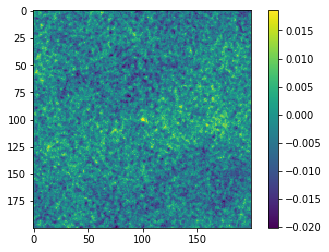

In [4]:
# calculate mean value using 3 example data files
path = "data/example_fits_images_mean/"
data  = mean_fits([path + 'image0.fits', path + 'image1.fits', path + 'image2.fits'])
print(data[100, 100])

# plot the result:
plt.imshow(data.T, cmap=plt.cm.viridis)
plt.colorbar()
plt.show()